In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np                    # For mathematical calculations

import matplotlib.pyplot as plt       # For plotting graphs
import seaborn as sns                  # For data visualization
%matplotlib inline                   

from sklearn.preprocessing import LabelEncoder , MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier 
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression,LinearRegression


# Boosting Algorithms :
from sklearn.ensemble                 import RandomForestClassifier
from sklearn.ensemble                 import ExtraTreesClassifier
from xgboost.sklearn                  import XGBClassifier,XGBRegressor
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier
from sklearn.ensemble                 import VotingClassifier, RandomForestClassifier

In [2]:
#Reading the data
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

In [3]:
#Let's make a copy of train and test data so that even if we make any changes in these datasets , we would not lose the original datasets
train_original=train.copy()
test_original=test.copy()

We will look at the structure of the train and test datasets.Firstly we will check the featuures present in our data and then we will look at their data types

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable , i.e Loan_Status in the train dataset.

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the loan_Status. We will predict the Loan_Status using the model built using the train data.

In [6]:
# Print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:

- object(Categorical) : Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area, Loan_Status

- int64 : ApplicanrIncome

- float64 : CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History

In [7]:
#Lets look at the shape of the train dataset
train.shape

(614, 13)

We have 614 rows and 13 columns in the train dataset

In [8]:
# Lets look at the shape of the test dataset
test.shape

(367, 12)

We have 367 rows and 12 columns in the test dataset

In [9]:
# Getting the top 5 rows of train dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# Getting the top 5 rows of test dataset
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [11]:
# Dropping duplicates from dataset
train.drop_duplicates(keep='first',inplace = True)
test.drop_duplicates(keep='first',inplace = True)

In [12]:
train.shape,test.shape

((614, 13), (367, 12))

So there were not any duplicates in our dataset

In [13]:
# Getting the statistical check for train dataset
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
# Getting the statistical check for test dataset
test.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#### UNIVARIATE ANALYSIS

Lets look first at the traget variable

In [15]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

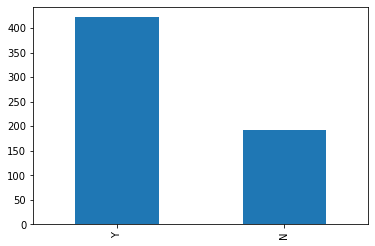

In [16]:
train['Loan_Status'].value_counts().plot.bar()

The target is imbalanced slightly.

### Now lets visualize each variable separately. 

- Nominal Categorical features: Gender,Married,Self_Employed,Credit_History,Loan_Status


- Ordinal features: Dependents,Education,Property_Area


- Numerical features: ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amont_term
 
 

Lets visualize the categorical and ordinal features first

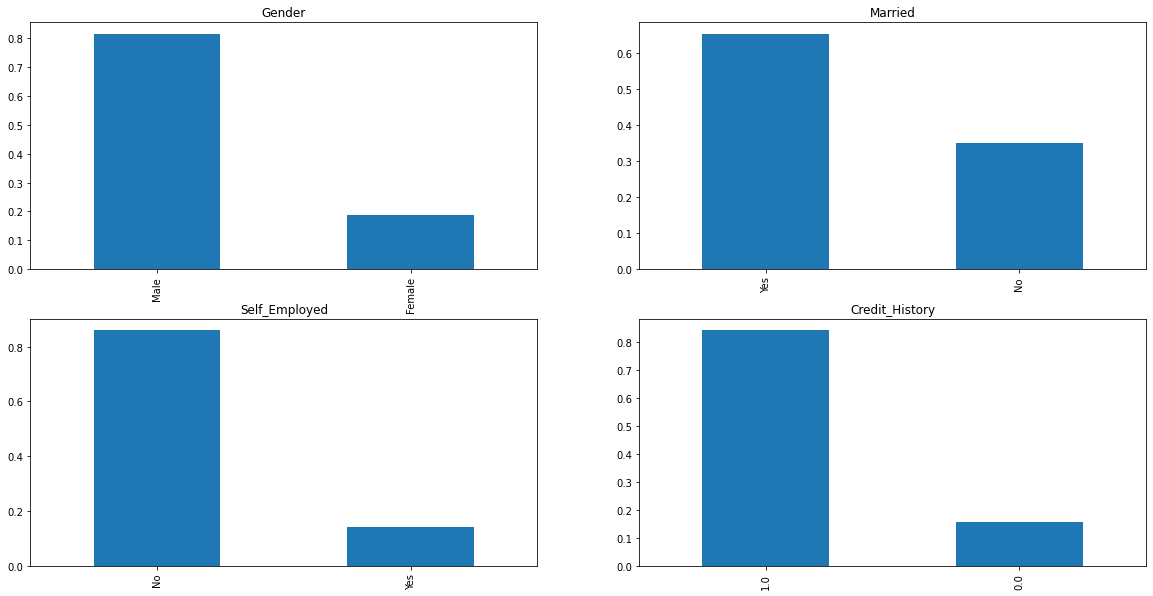

In [17]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

It can be inferred from the above bar plots that :
    
- 80 % applicants in the dataset are male.

- Around 65% of the applicants in the dataset are married.

- Around 15% applicants in the dataset are self employed.

- Arounf 85% applicants have repaid their debts

In [18]:
# Now Let's visualize the ordinal variables

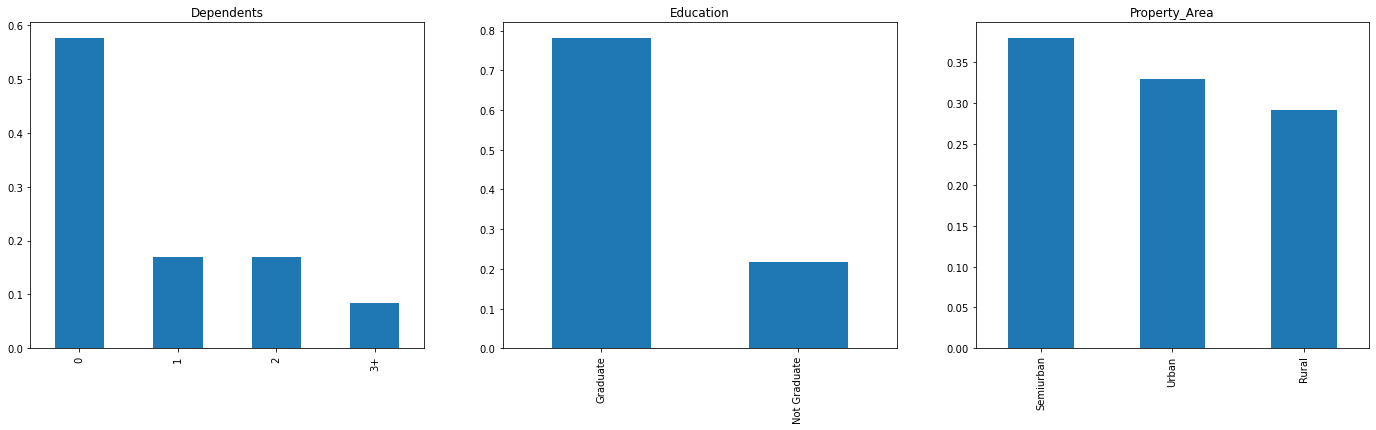

In [19]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()


It can be inferred from the above plots that :
    
- Most of the applicants don't have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from the Semiurban area

Lets visualize the Numerical features

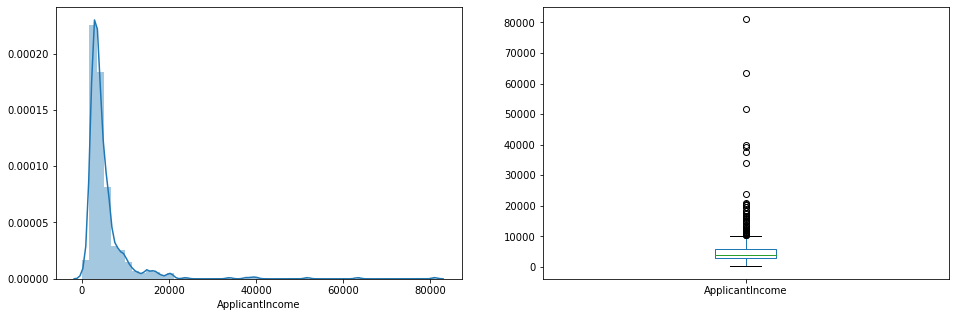

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towwards left which means it is not normally distributed. We will try to make it normal in later sections as algorithm works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people withh different education levels.Let us segregate them by Education:

Text(0.5, 0.98, '')

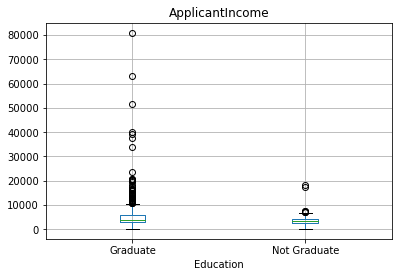

In [21]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher nuumber of graduates with very high incomes,which are appearing to be the outliers

Let's look at the Coapplicant income distribution.

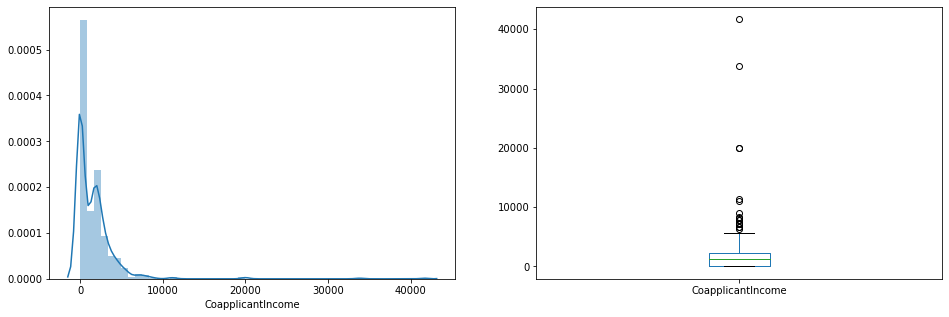

In [22]:

plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as thhat of the applicant income. Majortiy of the coapplicant's income range between 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Lets look at the distribution of LaonAmount variable

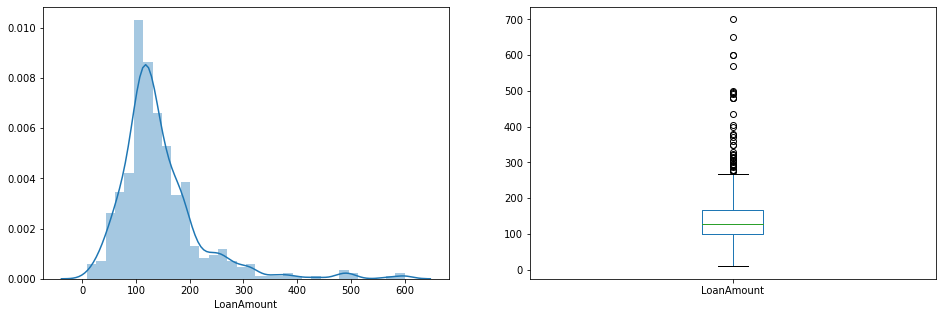

In [23]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal.We will treat the outliers in later sections 

#### BIVRIATE ANALYSIS

Lets try to analyse each feature with the target variable

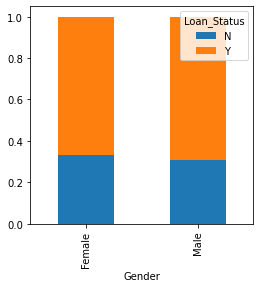

In [24]:

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that thhe propeortion of male and female applicants is more or less same for both approved and uunapproved loans.

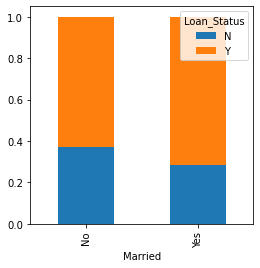

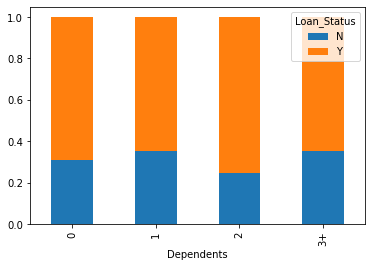

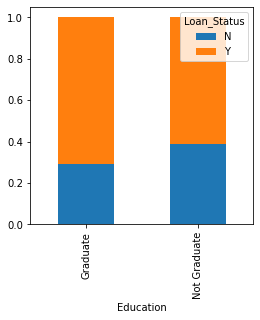

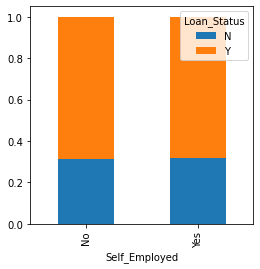

In [25]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

It can be inferred that :

- Proportion of married applicants is higher for the approved loans

- Distribution of applicants with 1 or 3+ depedents is similar across both the categories of Loan_Status.

- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

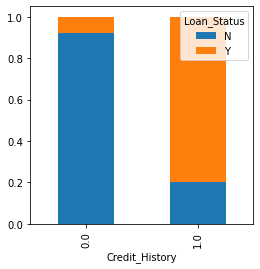

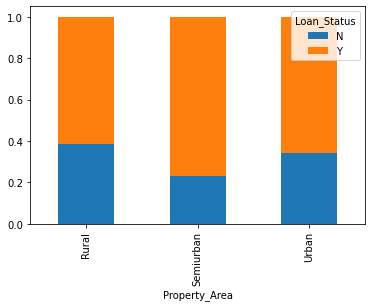

In [26]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.

- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urbam areas.

Lets try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved

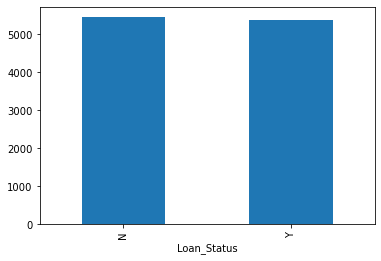

In [27]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here we don't see any change in the mean income.So lets make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [28]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

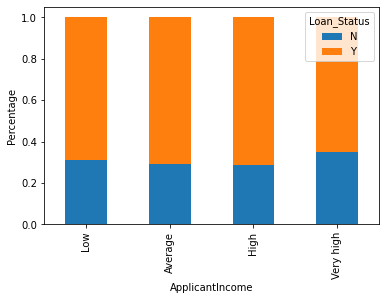

In [29]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner

In [30]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

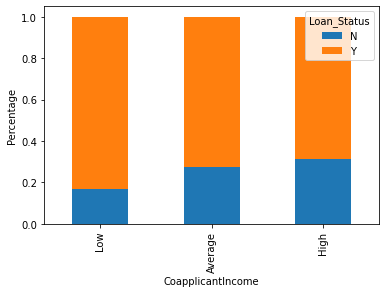

In [31]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows  that if coapplicant's income is less the chances of loan approval are high. But this does not look right.The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicants is 0 nd hence the loan approval is not dependent on it. So we can make a new variable in whhich we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of income on loan approval.

In [32]:

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [33]:

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

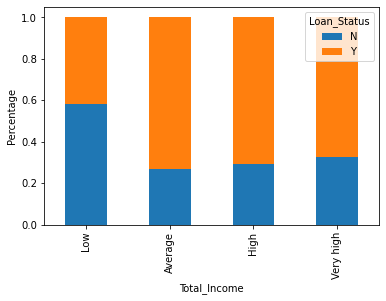

In [34]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with average ,High and Very High Income

In [35]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)


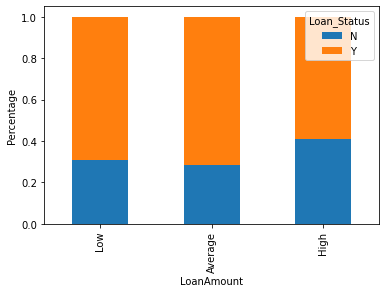

In [36]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

Lets drop the bins which we created for the exploration part.We will change the 3+ in dependents varaible to 3 to make it a numerical variable. We will also convert the target variable's categories into 0 and 1 so that we can find its correlation with nmerical variables. One more reason to do so is few modela like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1

In [37]:

train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [38]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation bbetween all the numerical variables. We will use the heat map to visualize the correlation.heatmaps visualize data througgh variations in coloring.The variables with darker color means their correlation is more

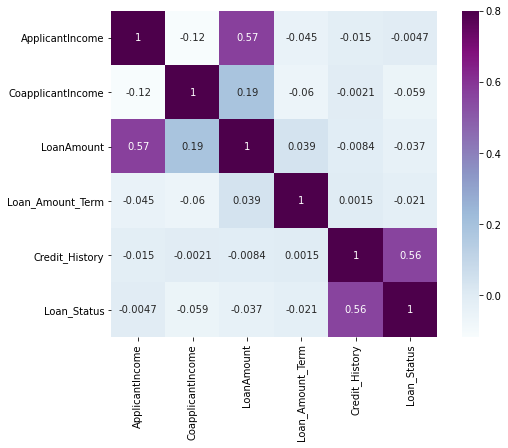

In [39]:

matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot = True);

We see that the most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

### Missing Vale and Outlier Treatment

In [40]:

train.isnull().sum()/len(train)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

There are missing vales in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_term and Credit_History features

There are very less missing values in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_term and Credit_History features

In [41]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [42]:
train.isnull().sum()/len(train)*100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Now let's try to find a way to fill the missing values in Loan_Amount_Term. We will look at thhe vale count of the loan amount term variable.

In [43]:
train['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

It can be seen that in loan amount term variable , the value of 360 is repeating the most.So we will replace the missing values in this variabe using the mode of this variable

In [44]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers

In [45]:

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Lets check whether all the missing values are filled in the dataset. 

In [46]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Lets fill the missing values in the dataset

In [47]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation.As we take the log transformation , it does not affect the smaller valuues much, but reduces the larger values. So we get a distribution similar to normal distribution.

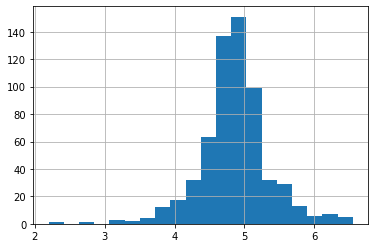

In [48]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's build a logistic regression model and make predictions for the test dataset.

In [49]:
# Dropping Loan_Id as its nique
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [50]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [51]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [52]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [53]:
# Mapping Binary Columns for train dataset
train['Gender'] = train['Gender'].replace({'Female':1, 'Male':0})
train['Married'] = train['Married'].replace({'Yes':1, 'No':0})
train['Education'] = train['Education'].replace({'Graduate':1, 'Not Graduate':0})
train['Self_Employed'] = train['Self_Employed'].replace({'Yes':1, 'No':0})                                                        

In [54]:
# Mapping Binary Columns
test['Gender'] = test['Gender'].replace({'Female':1, 'Male':0})
test['Married'] = test['Married'].replace({'Yes':1, 'No':0})
test['Education'] = test['Education'].replace({'Graduate':1, 'Not Graduate':0})
test['Self_Employed'] = test['Self_Employed'].replace({'Yes':1, 'No':0})    

In [55]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [56]:
# Creating dummy variables for Property_Area 
dummy_columns = [ 'Property_Area']
for column in dummy_columns:
    train = pd.concat([train,pd.get_dummies(train[column],prefix=column)],axis=1)

train.drop(dummy_columns, axis=1, inplace=True)

In [57]:
# Creating dummy variables for Property_Area 
dummy_columns = [ 'Property_Area']
for column in dummy_columns:
    test = pd.concat([test,pd.get_dummies(test[column],prefix=column)],axis=1)

test.drop(dummy_columns, axis=1, inplace=True)

In [58]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,4.852030,1,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,4.189655,0,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,4.948760,0,0,1


In [59]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [60]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,4.852030,0,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,4.852030,1,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,4.189655,0,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,4.787492,0,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,4.948760,0,0,1


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [63]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
pred_cv = model.predict(x_cv)

In [65]:
accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [66]:
pred_test = model.predict(test)

In [67]:

submission=pd.read_csv('sample_submission_49d68Cx.csv')

In [68]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [69]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [70]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

#### Logistic Regression using stratified k-folds cross validation

In [71]:
from sklearn.model_selection import StratifiedKFold

In [72]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918


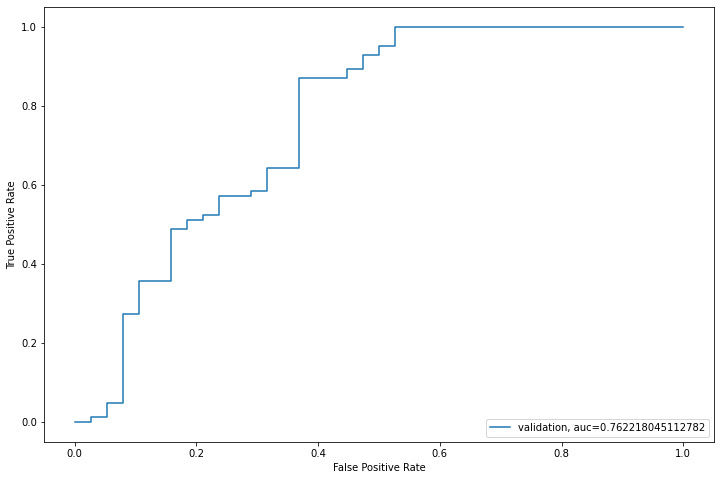

In [73]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [74]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [75]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [76]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

Based on the domain knowledge , we can come up with new features thhat might affect the target variable. We will create the following three new features:

- Total Income : Combine the Applicant Income and Coapplicant Income. If the total income is high , chnaces of loan approval might also be high.

- EMI - EMI is the monthly amont to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI's might find it difficult to pay back the loan.We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term

- Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances of lon approval.

In [77]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

Lets check the distribtion of Total Income

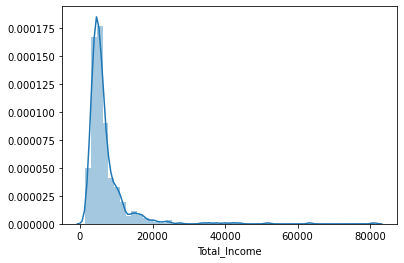

In [78]:
sns.distplot(train['Total_Income']);

We can see it is shifted towards left, i.e.,the distribution is right skewed. SO lets take the log transformation to make the distribution normal

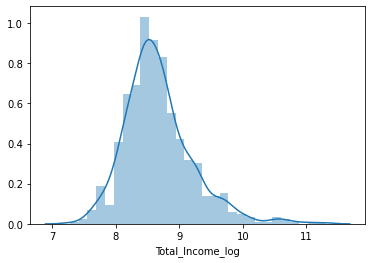

In [79]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks muuch closer to normal and effect of extreme values has been significantly subsided .Lets create the EMI feature now

In [80]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

Lets check the distribution of EMI variable

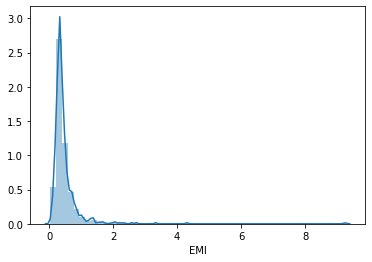

In [81]:

sns.distplot(train['EMI']);

Lets create balance Income feature now and check its distribution

In [82]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

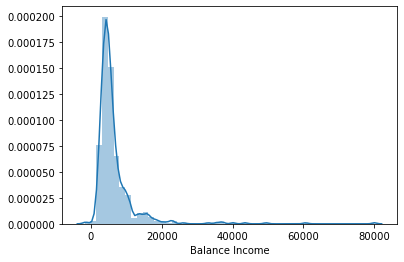

In [83]:
sns.distplot(train['Balance Income']);

Let us now drop the variables which we used to create these new features.

In [84]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)


#### Model Building : Part II

In [85]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status   

In [86]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.7983870967741935

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918


In [87]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [88]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [89]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

In [90]:
#Decision Tree#

In [91]:
from sklearn import tree

In [92]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.75

2 of kfold 5
accuracy_score 0.7096774193548387

3 of kfold 5
accuracy_score 0.6639344262295082

4 of kfold 5
accuracy_score 0.6885245901639344

5 of kfold 5
accuracy_score 0.680327868852459


In [93]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [94]:

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [95]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

In [96]:
#Random Forest#

In [97]:

from sklearn.ensemble import RandomForestClassifier

In [98]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.7903225806451613

3 of kfold 5
accuracy_score 0.7540983606557377

4 of kfold 5
accuracy_score 0.7540983606557377

5 of kfold 5
accuracy_score 0.819672131147541


In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [101]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [103]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

C:\Users\SHWETA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [104]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [105]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.7868852459016393

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8442622950819673


In [106]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [107]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [108]:

# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

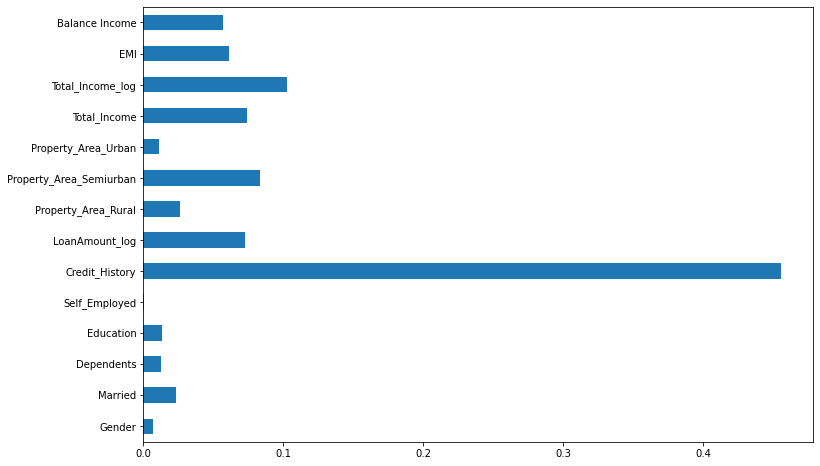

In [109]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [110]:
#XGBoost#

In [121]:
X['Dependents'] = X['Dependents'].astype(int)

In [126]:
test['Dependents'] = test['Dependents'].astype(int)

In [127]:

from xgboost import XGBClassifier

In [128]:
train['Dependents'].value_counts(normalize = True)

0    0.586319
1    0.166124
2    0.164495
3    0.083062
Name: Dependents, dtype: float64

In [129]:
X.dtypes

Gender                       int64
Married                      int64
Dependents                   int32
Education                    int64
Self_Employed                int64
Credit_History             float64
LoanAmount_log             float64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Total_Income               float64
Total_Income_log           float64
EMI                        float64
Balance Income             float64
dtype: object

In [130]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7459016393442623

5 of kfold 5
accuracy_score 0.819672131147541


In [131]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [132]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [133]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')